# Algorithms, pre-processing and evaluation metrices used
1. Trend Analysis: How has AI adoption grown over time? AI Adoption Growth (2020-2025)
- Analyze how AI adoption has changed from 2020 to 2025 globally across industries.

In [61]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [63]:
# Load data
df = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

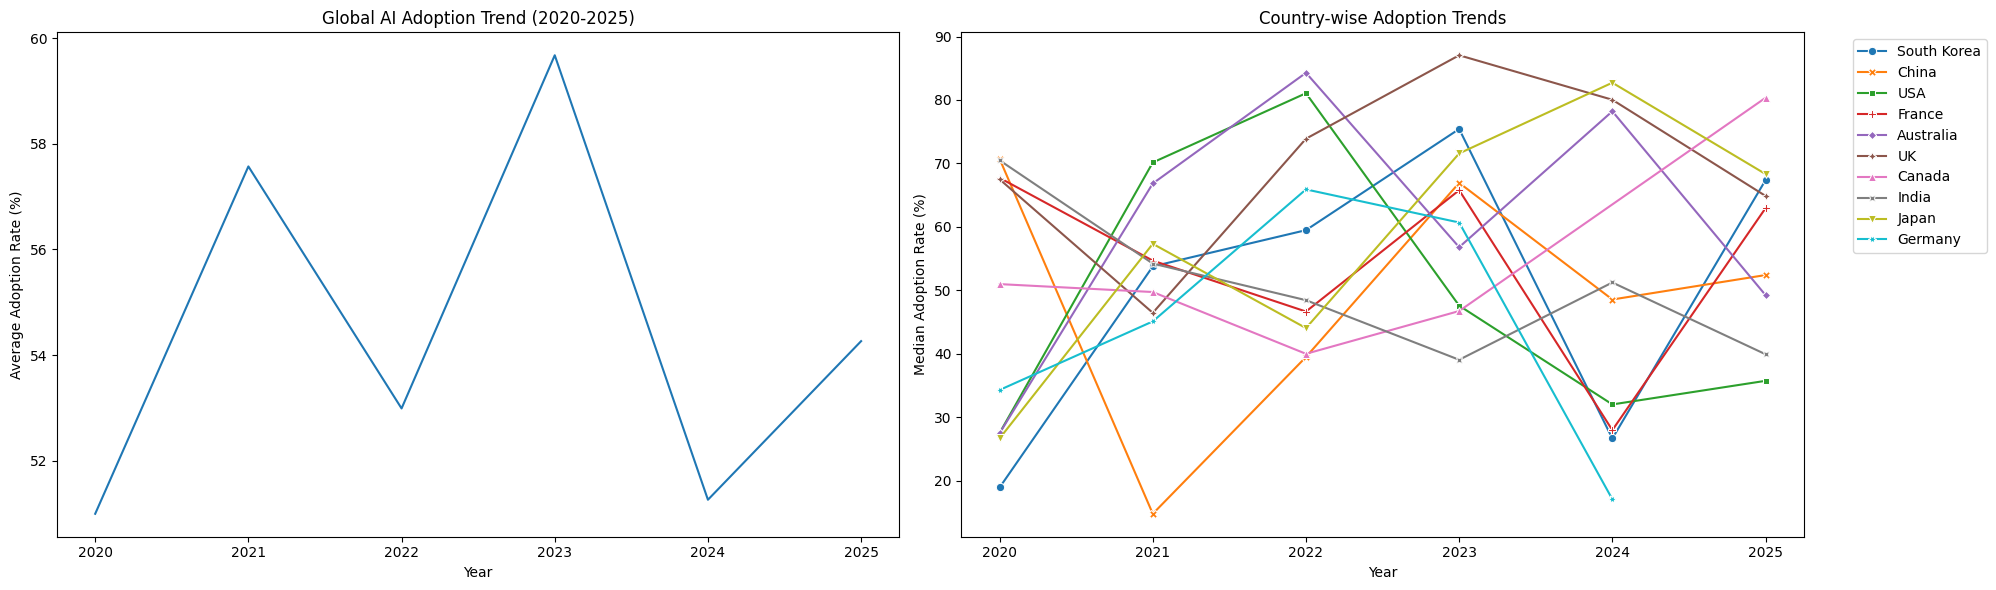

In [64]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Global Trend
sns.lineplot(
    data=df,
    x='Year', 
    y='AI Adoption Rate (%)',
    markers=True,     
    dashes=False,
    estimator='mean',
    errorbar=None,
    ax=ax1
)
ax1.set_title("Global AI Adoption Trend (2020-2025)")
ax1.set_ylabel("Average Adoption Rate (%)")
ax1.set_xticks(sorted(df['Year'].unique()))

# Country-wise Trend plot with enhanced styling
sns.lineplot(
    data=df,
    x='Year', 
    y='AI Adoption Rate (%)',
    hue='Country',
    style='Country',  # Add this line
    markers=True,      # Add this line
    dashes=False,      # Add this line
    estimator='median',
    errorbar=None,
    ax=ax2
)
ax2.set_title("Country-wise Adoption Trends")
ax2.set_ylabel("Median Adoption Rate (%)")
ax2.set_xticks(sorted(df['Year'].unique()))
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

1. Data Pre-processing

In [65]:
# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Handle missing values
df['AI Adoption Rate (%)'] = df.groupby('Industry')['AI Adoption Rate (%)'].transform(
    lambda x: x.fillna(x.mean())
)

# Outlier handling
Q1 = df['AI Adoption Rate (%)'].quantile(0.25)
Q3 = df['AI Adoption Rate (%)'].quantile(0.75)
df = df[(df['AI Adoption Rate (%)'] >= Q1-1.5*(Q3-Q1)) & 
        (df['AI Adoption Rate (%)'] <= Q3+1.5*(Q3-Q1))]

# Temporal aggregation
trend_df = df.groupby(['Year', 'Industry'])['AI Adoption Rate (%)'].mean().unstack()

In [66]:
# Step 2: Preview the data
print(df.head())

# Step 3: Check and convert data types if needed
df['Year'] = df['Year'].astype(int)
df['AI Adoption Rate (%)'] = pd.to_numeric(df['AI Adoption Rate (%)'], errors='coerce')

# Step 4: Handle missing or invalid values
df = df.dropna(subset=['AI Adoption Rate (%)'])

# Step 5: Group by year and calculate mean AI adoption rate
trend_df = df.groupby('Year')['AI Adoption Rate (%)'].mean().reset_index()

# # Step 6: Plot the trend
# plt.figure(figsize=(10,6))
# sns.lineplot(data=trend_df, x='Year', y='AI Adoption Rate (%)', marker='o', color='blue')
# plt.title('Trend of AI Adoption Rate (2020–2025)', fontsize=14)
# plt.xlabel('Year')
# plt.ylabel('Average AI Adoption Rate (%)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


       Country       Year    Industry  AI Adoption Rate (%)  \
0  South Korea 2022-01-01       Media                 44.29   
1        China 2025-01-01       Legal                 34.75   
2          USA 2022-01-01  Automotive                 81.06   
3       France 2021-01-01       Legal                 85.24   
4       France 2021-01-01      Gaming                 78.95   

   AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                       33.09                   16.77   
1                                       66.74                   46.89   
2                                       96.13                   10.66   
3                                       93.76                   27.70   
4                                       45.62                   17.45   

   Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                           46.12                            74.79   
1                           52.46         

In [67]:
# Step 1: Preprocess the Data

# Load the dataset and remove leading/trailing spaces in column names
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
df.columns = df.columns.str.strip()

# Convert 'Year' column to datetime format (only if it's string or int)
df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

# Rename column for easier access (optional but recommended)
df.rename(columns={'AI Adoption Rate (%)': 'AI_Adoption_Rate'}, inplace=True)

# Group by Year and get average adoption rate
trend_df = df.groupby('Year')['AI_Adoption_Rate'].mean().reset_index()

# Set Year as index
trend_df.set_index('Year', inplace=True)

# Preview the trend dataframe
print(trend_df.head())


            AI_Adoption_Rate
Year                        
2020-01-01         50.992766
2021-01-01         57.571875
2022-01-01         52.988065
2023-01-01         59.677241
2024-01-01         51.258696


In [68]:
# Step 2: Prepare and Train Linear Regression Model
from sklearn.linear_model import LinearRegression
import numpy as np

# Reset index to get 'Year' back as a column (as numeric)
trend_df = trend_df.reset_index()

# Convert Year to integer (since it's currently datetime)
trend_df['Year_Num'] = trend_df['Year'].dt.year

# Define X (independent variable) and y (dependent variable)
X = trend_df[['Year_Num']]   # Must be 2D array
y = trend_df['AI_Adoption_Rate']  # 1D target values

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict AI adoption rates using the trained model
trend_df['Predicted'] = model.predict(X)

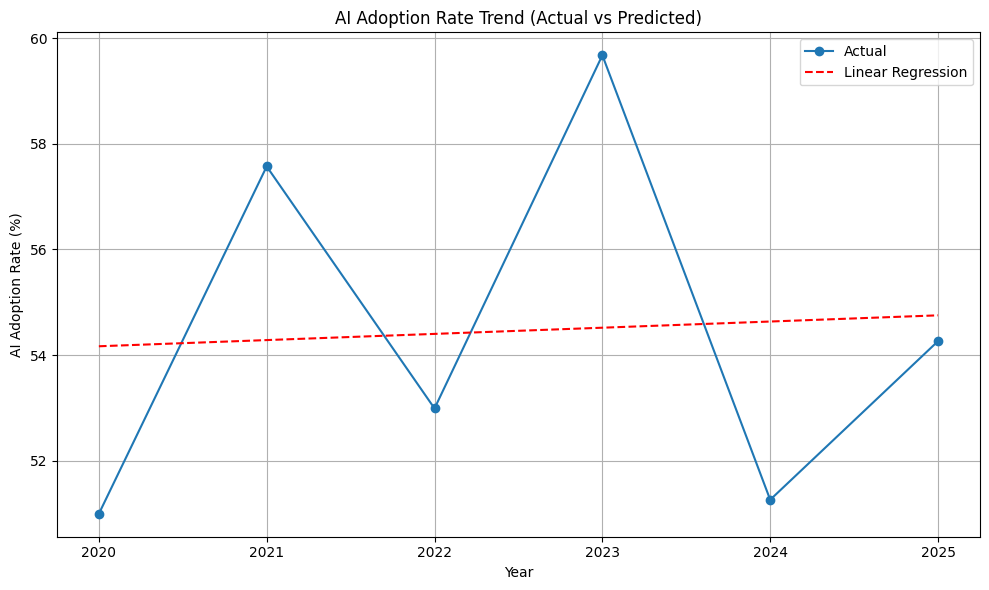

In [69]:
# Step 4: Visualize Actual vs Predicted Trend


import matplotlib.pyplot as plt

# Plot actual and predicted trend
plt.figure(figsize=(10, 6))
plt.plot(trend_df['Year_Num'], trend_df['AI_Adoption_Rate'], marker='o', label='Actual')
plt.plot(trend_df['Year_Num'], trend_df['Predicted'], linestyle='--', color='red', label='Linear Regression')

plt.title('AI Adoption Rate Trend (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('AI Adoption Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


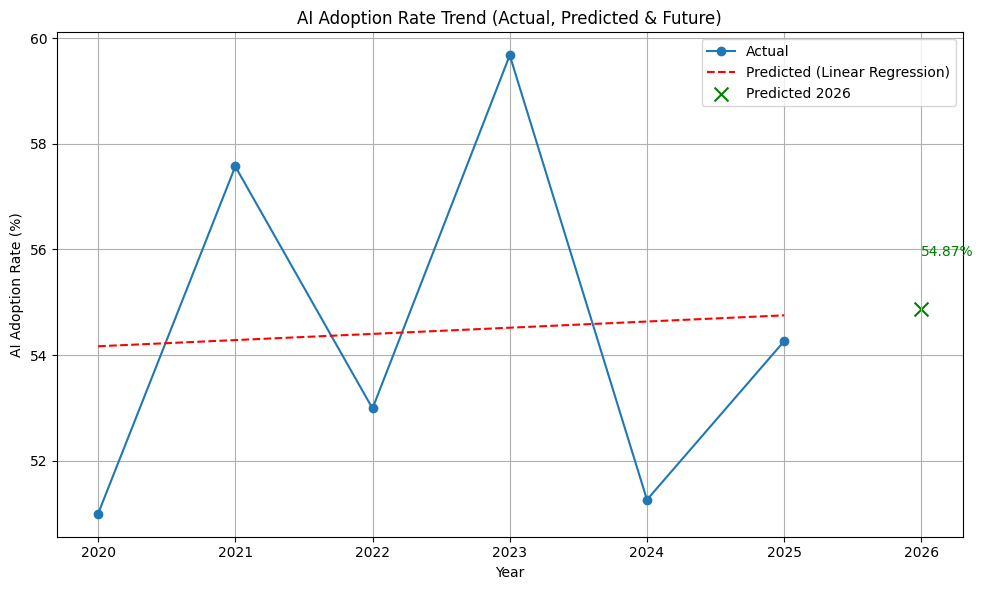

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming trend_df and model from previous steps are already available

# Predict for future year
future_year = np.array([[2026]])
future_prediction = model.predict(future_year)

# Append future prediction to the plot
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(trend_df['Year_Num'], trend_df['AI_Adoption_Rate'], marker='o', label='Actual')

# Plot predicted trend line
plt.plot(trend_df['Year_Num'], trend_df['Predicted'], linestyle='--', color='red', label='Predicted (Linear Regression)')

# Plot the prediction for 2026
plt.scatter(future_year, future_prediction, color='green', marker='x', s=100, label='Predicted 2026')
plt.text(future_year[0][0], future_prediction[0]+1, f'{future_prediction[0]:.2f}%', color='green')

# Labels and formatting
plt.title('AI Adoption Rate Trend (Actual, Predicted & Future)')
plt.xlabel('Year')
plt.ylabel('AI Adoption Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [73]:
# Step 4: Model Evaluation

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate metrics
mae = mean_absolute_error(trend_df['AI_Adoption_Rate'], trend_df['Predicted'])
r2 = r2_score(trend_df['AI_Adoption_Rate'], trend_df['Predicted'])

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.82
R² Score: 0.00
